In [1]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-30 10:26:27--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-30 10:26:28 (18.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

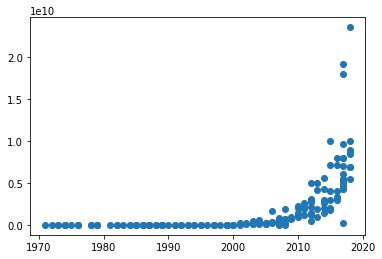

In [13]:
plt.scatter(X,Y)

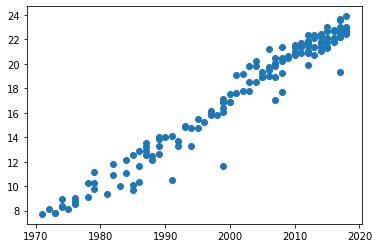

In [14]:
Y = np.log(Y)
plt.scatter(X,Y)

In [15]:
X = X - X.mean()

In [16]:
import tensorflow as tf

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
    if epoch >= 50:
        lr = 0.00001
    return 0.001


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 735us/sample - loss: 382.2536
Epoch 2/200
162/162 [==============================] - 0s 49us/sample - loss: 285.3438
Epoch 3/200
162/162 [==============================] - 0s 32us/sample - loss: 271.9848
Epoch 4/200
162/162 [==============================] - 0s 49us/sample - loss: 196.5573
Epoch 5/200
162/162 [==============================] - 0s 43us/sample - loss: 175.7914
Epoch 6/200
162/162 [==============================] - 0s 56us/sample - loss: 184.1604
Epoch 7/200
162/162 [==============================] - 0s 44us/sample - loss: 164.2979
Epoch 8/200
162/162 [==============================] - 0s 63us/sample - loss: 124.2249
Epoch 9/200
162/162 [==============================] - 0s 43us/sample - loss: 70.4681
Epoch 10/200
162/162 [==============================] - 0s 62us/sample - loss: 52.6681
Epoch 11/200
162/162 [==============================] - 0s 56us/sample - loss: 47.4714
Epoch 12/200
162/162 [

162/162 [==============================] - 0s 54us/sample - loss: 0.9155
Epoch 96/200
162/162 [==============================] - 0s 47us/sample - loss: 0.9693
Epoch 97/200
162/162 [==============================] - 0s 52us/sample - loss: 0.8924
Epoch 98/200
162/162 [==============================] - 0s 41us/sample - loss: 0.8905
Epoch 99/200
162/162 [==============================] - 0s 60us/sample - loss: 0.9067
Epoch 100/200
162/162 [==============================] - 0s 49us/sample - loss: 0.8877
Epoch 101/200
162/162 [==============================] - 0s 44us/sample - loss: 0.9061
Epoch 102/200
162/162 [==============================] - 0s 50us/sample - loss: 0.8949
Epoch 103/200
162/162 [==============================] - 0s 40us/sample - loss: 0.8747
Epoch 104/200
162/162 [==============================] - 0s 46us/sample - loss: 0.9131
Epoch 105/200
162/162 [==============================] - 0s 42us/sample - loss: 0.9478
Epoch 106/200
162/162 [==============================] - 0s 5

162/162 [==============================] - 0s 43us/sample - loss: 0.9207
Epoch 190/200
162/162 [==============================] - 0s 41us/sample - loss: 0.8884
Epoch 191/200
162/162 [==============================] - 0s 54us/sample - loss: 0.9499
Epoch 192/200
162/162 [==============================] - 0s 46us/sample - loss: 0.9150
Epoch 193/200
162/162 [==============================] - 0s 43us/sample - loss: 0.9227
Epoch 194/200
162/162 [==============================] - 0s 45us/sample - loss: 0.9252
Epoch 195/200
162/162 [==============================] - 0s 48us/sample - loss: 0.8824
Epoch 196/200
162/162 [==============================] - 0s 45us/sample - loss: 0.9004
Epoch 197/200
162/162 [==============================] - 0s 47us/sample - loss: 0.9109
Epoch 198/200
162/162 [==============================] - 0s 49us/sample - loss: 0.9040
Epoch 199/200
162/162 [==============================] - 0s 51us/sample - loss: 0.9445
Epoch 200/200
162/162 [==============================] - 

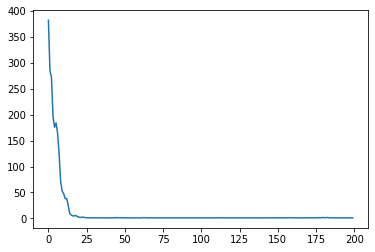

In [21]:
plt.plot(r.history['loss'],label='loss')

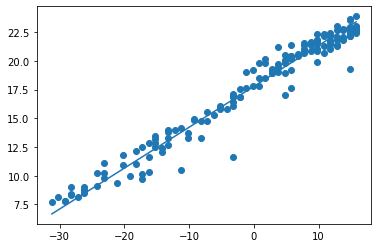

In [22]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)